<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210705%5D_Polynomial_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1

https://www.youtube.com/watch?v=QptI-vDle8Y

In [29]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [31]:
# Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()

Saving AEa.xlsx to AEa.xlsx


In [32]:
dataset= pd.read_csv('AEa.csv')

In [33]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,ppm,A,Ea
0,0,152055.4,21994.10
1,400,193493.7,22268.31
2,800,238947.7,22514.70
3,1000,262498.3,22625.97
4,1200,286645.1,22729.29


In [34]:
X

array([[   0],
       [ 400],
       [ 800],
       [1000],
       [1200],
       [1600],
       [2000],
       [2500]])

In [95]:
y

array([152055.4, 193493.7, 238947.7, 262498.3, 286645.1, 336044.9,
       387705. , 454521.3])

In [36]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
X_poly

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 4.00000e+02, 1.60000e+05, 6.40000e+07, 2.56000e+10],
       [1.00000e+00, 8.00000e+02, 6.40000e+05, 5.12000e+08, 4.09600e+11],
       [1.00000e+00, 1.00000e+03, 1.00000e+06, 1.00000e+09, 1.00000e+12],
       [1.00000e+00, 1.20000e+03, 1.44000e+06, 1.72800e+09, 2.07360e+12],
       [1.00000e+00, 1.60000e+03, 2.56000e+06, 4.09600e+09, 6.55360e+12],
       [1.00000e+00, 2.00000e+03, 4.00000e+06, 8.00000e+09, 1.60000e+13],
       [1.00000e+00, 2.50000e+03, 6.25000e+06, 1.56250e+10, 3.90625e+13]])

In [38]:
y_pred = lin_reg.predict(X_poly)

In [39]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,21994.10,21993.873368
1,22268.31,22269.137878
2,22514.70,22514.132529
3,22625.97,22625.315813
4,22729.29,22729.283003
5,22916.07,22917.469257
6,23084.97,23084.025516
7,23273.73,23273.902635


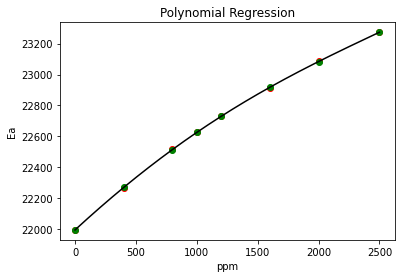

In [40]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('ppm')
plt.ylabel('Ea')
plt.show()

In [41]:
lin_reg.coef_

array([ 0.00000000e+00,  7.24819417e-01, -8.88931084e-05, -8.47844645e-09,
        3.99458244e-12])

In [42]:
lin_reg.intercept_

21993.873368150144

In [43]:
# R2 Score
print("R2 :",r2_score(y,y_pred))

R2 : 0.9999964919713845


Text(0, 0.5, 'Ea')

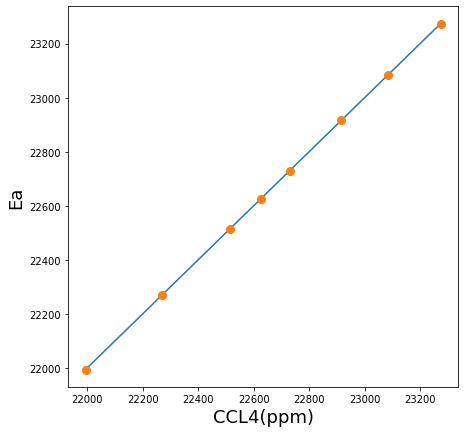

In [44]:
figlim_reg2 = [np.array(min(np.min(y), np.min(y_pred))),np.array(max(np.max(y), np.max(y_pred)))]

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1)
ax.plot(np.array(figlim_reg2),np.array(figlim_reg2))
ax.plot(np.array(y),y_pred, '.',markersize =16)
ax.set_xlabel("CCL4(ppm)", fontsize=18)
ax.set_ylabel("Ea", fontsize=18)

# Sum up and Put all Together in Package
1.   Polynomial Regression Train Function
2.   Polynomial Regression Predict Function



Saving AEa.csv to AEa (17).csv
train validation
   Real Values  Predicted Values
0     152055.4     152023.872636
1     193493.7     193611.181688
2     238947.7     238843.528317
3     262498.3     262460.523165
4     286645.1     286607.009511
5     336044.9     336247.827627
6     387705.0     387572.290387
7     454521.3     454545.166668
R2 : 0.9999987523462887
lin_reg.coef_ : [ 0.00000000e+00  9.81961573e+01  1.61896995e-02 -4.69807567e-06
  7.48869411e-10]
lin_reg.intercept_ : 152023.87263589114
----------------------------------------------------------------------


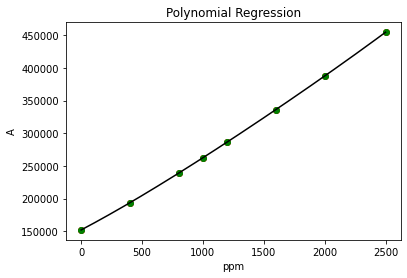

In [88]:
import io
# Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
dataset= pd.read_csv(filename)


X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values
X_title = dataset.columns[0]
y_title = dataset.columns[1]

'''
print("X :", X)
print("y :", y)
print("X_title :", X_title)
print("y_title :", y_title)
'''

# Model Build and Train
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

y_pred = lin_reg.predict(X_poly)

# Train Comparisoon
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
print("train validation")
print(df)

# R2 Score
print("R2 :",r2_score(y,y_pred))

# Show Polynomial Equation
print("lin_reg.coef_ :", lin_reg.coef_)
print("lin_reg.intercept_ :", lin_reg.intercept_)

# Show Figure
print("----------------------------------------------------------------------")
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel(X_title)
plt.ylabel(y_title)
plt.show()

In [96]:
def poly_train(y_index,degree_value):
  import io
  # Upload CSV From a local drive
  from google.colab import files
  uploaded = files.upload()
  filename = next(iter(uploaded))
  dataset= pd.read_csv(filename)


  X = dataset.iloc[:, 0:1].values
  y = dataset.iloc[:, y_index].values
  X_title = dataset.columns[0]
  y_title = dataset.columns[y_index]

  '''
  print("X :", X)
  print("y :", y)
  print("X_title :", X_title)
  print("y_title :", y_title)
  '''

  # Model Build and Train
  poly_reg = PolynomialFeatures(degree = degree_value)
  X_poly = poly_reg.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)

  y_pred = lin_reg.predict(X_poly)

  # Train Comparisoon
  df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
  print("train validation")
  print(df)

  # R2 Score
  print("R2 :",r2_score(y,y_pred))

  # Show Polynomial Equation
  print("lin_reg.coef_ :", lin_reg.coef_)
  print("lin_reg.intercept_ :", lin_reg.intercept_)

  # Show Figure
  print("----------------------------------------------------------------------")
  X_grid = np.arange(min(X), max(X), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(X, y, color = 'red')
  plt.scatter(X, y_pred, color = 'green')
  plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
  plt.title('Polynomial Regression')
  plt.xlabel(X_title)
  plt.ylabel(y_title)
  plt.show()

Saving AEa.csv to AEa (18).csv
train validation
   Real Values  Predicted Values
0     152055.4     152023.872636
1     193493.7     193611.181688
2     238947.7     238843.528317
3     262498.3     262460.523165
4     286645.1     286607.009511
5     336044.9     336247.827627
6     387705.0     387572.290387
7     454521.3     454545.166668
R2 : 0.9999987523462887
lin_reg.coef_ : [ 0.00000000e+00  9.81961573e+01  1.61896995e-02 -4.69807567e-06
  7.48869411e-10]
lin_reg.intercept_ : 152023.87263589114
----------------------------------------------------------------------


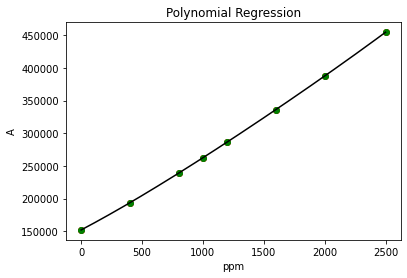

In [90]:
poly_train(1,4)

Saving AEa.csv to AEa (20).csv
train validation
   Real Values  Predicted Values
0     21994.10      21993.873368
1     22268.31      22269.137878
2     22514.70      22514.132529
3     22625.97      22625.315813
4     22729.29      22729.283003
5     22916.07      22917.469257
6     23084.97      23084.025516
7     23273.73      23273.902635
R2 : 0.9999964919713845
lin_reg.coef_ : [ 0.00000000e+00  7.24819417e-01 -8.88931084e-05 -8.47844645e-09
  3.99458244e-12]
lin_reg.intercept_ : 21993.873368150144
----------------------------------------------------------------------


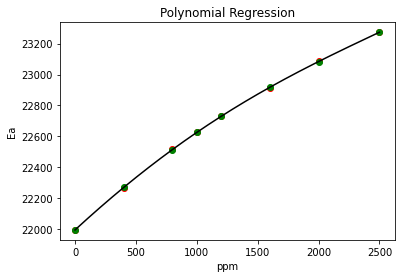

In [97]:
poly_train(2,4)